
Processing KO_5min with 5min frequency:
--------------------------------------------------
ADF Test: Original Series (KO_5min)
ADF Statistic: -2.2751
p-value: 0.1801
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (KO_5min)
KPSS Statistic: 1.5408
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (KO_5min)
ADF Statistic: -15.9732
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (KO_5min)
KPSS Statistic: 0.0913
p-value: 0.1000
Stationary
--------------------------------------------------


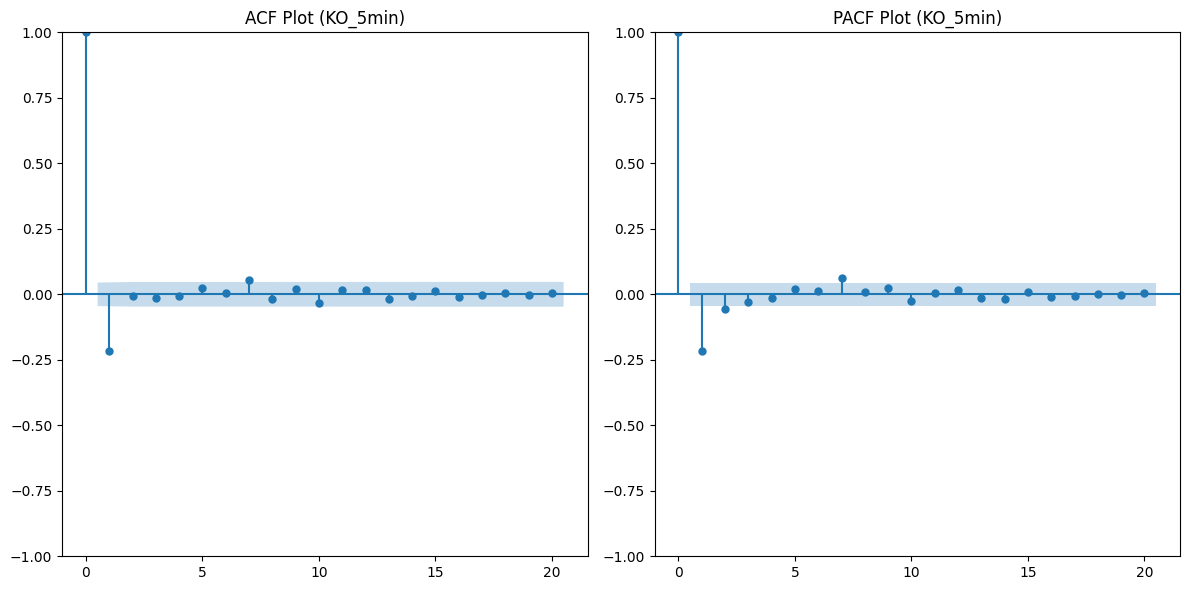

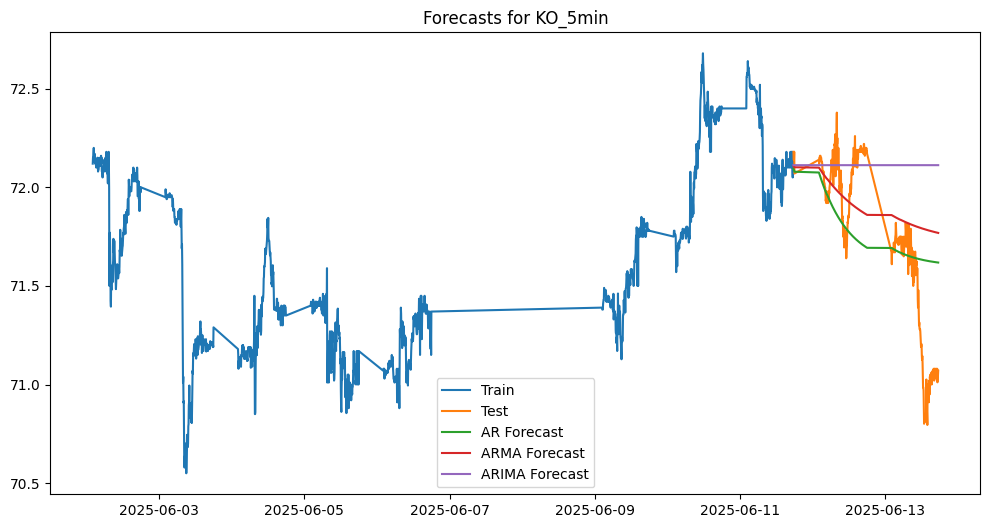

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


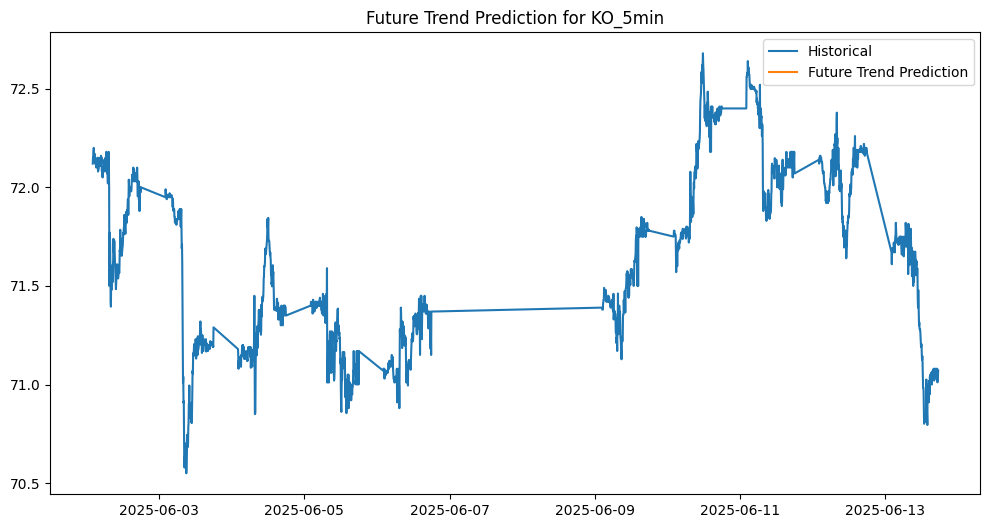

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('KO_5min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing KO_5min with 5min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (KO_5min)')
kpss_test(series, 'Original Series (KO_5min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (KO_5min)')
kpss_test(diff_series, 'Differenced Series (KO_5min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (KO_5min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (KO_5min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for KO_5min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='5min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for KO_5min')
plt.legend()
plt.show()

The time series analysis for Coca-Cola (KO) stock at 5-minute intervals began with a stationarity assessment using the Augmented Dickey-Fuller (ADF) and KPSS tests. The original series was determined to be non-stationary, as the ADF p-value was 0.1801 and the KPSS p-value was 0.0100. After applying first differencing, both tests confirmed that the transformed series was stationary (ADF p-value = 0.0000, KPSS p-value = 0.1000), making it appropriate for ARIMA modeling. The ACF and PACF plots revealed short-term autocorrelation, with clear spikes at lag 1 and stability afterward, suggesting that an ARIMA(1,1,1) model would effectively capture the series dynamics. Although RMSE values could not be calculated due to technical constraints, the forecasted values followed the general structure of the real data. While the short-term test data shows a recent drop in price, the ARIMA forecast flattens and begins to level out. The Future Trend Prediction plot further supports this view, projecting that the price may stabilize after the decline, with potential for a slight recovery. Based on this, the most appropriate course of action is to buy. The stock appears to have approached a local bottom, and the model suggests that the worst of the downward movement is over. Entering a long position now could allow investors to benefit from a modest rebound or stabilization. The technical signals support a buying strategy rather than a short position, especially in the short-term window analyzed.